In [27]:
#from dataset import *
import torchvision.datasets as dset
import json
import matplotlib.pyplot as plt
import cv2

from gluoncv import data, utils
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image

%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 2.51 ms


In [28]:
coco = {

    'path': '/media/jake/mark-4tb3/input/datasets/coco',
    'train' : '/media/jake/mark-4tb3/input/datasets/coco/train2017',
    'test' : '/media/jake/mark-4tb3/input/datasets/coco/test2017',
    'path2json' : '/media/jake/mark-4tb3/input/datasets/coco/instances_train2017.json'
}


time: 672 µs


In [29]:
import json

with open(coco['path2json']) as json_file: 
    data = json.load(json_file) 

time: 12.1 s


In [30]:
images=[data['images']]
anno = [data['annotations']]
cate = [data['categories']]

time: 618 ms


In [18]:
print(len(anno[0]),len(anno[0]),len(cate[0]))

860001 860001 80
time: 3.12 ms


In [19]:
cate[0][1]

{'supercategory': 'vehicle', 'id': 2, 'name': 'bicycle'}

time: 4.32 ms


# read dataset with CocoDetection

In [20]:
train = dset.CocoDetection(root=coco['train'], annFile=coco['path2json'])
print('Number of Sample:{}, type:{}'.format(len(train),type(train)))

loading annotations into memory...
Done (t=11.39s)
creating index...
index created!
Number of Sample:118287, type:<class 'torchvision.datasets.coco.CocoDetection'>
time: 13.4 s


# Draw dataset

In [21]:
train_image,class_ids = train[7]
print(train_image.size,type(train_image),type(class_ids))

(640, 488) <class 'PIL.Image.Image'> <class 'list'>
time: 9.93 ms


In [22]:
class_ids

[{'segmentation': [[261.2,
    251.71,
    270.82,
    259.04,
    274.94,
    259.04,
    267.61,
    260.41,
    267.16,
    263.16,
    272.65,
    262.24,
    277.23,
    261.79,
    280.44,
    255.37,
    284.56,
    248.05,
    285.93,
    245.3,
    301.5,
    243.47,
    305.16,
    243.93,
    309.28,
    232.94,
    305.62,
    216.45,
    300.58,
    208.21,
    296.92,
    205.92,
    293.26,
    206.84,
    290.97,
    210.96,
    290.97,
    216.0,
    293.71,
    221.49,
    295.09,
    224.7,
    287.3,
    233.85,
    281.81,
    234.31,
    275.86,
    237.06,
    275.86,
    243.01,
    273.11,
    248.05,
    271.28,
    249.88,
    268.07,
    252.17,
    265.78,
    251.71,
    261.66,
    250.8]],
  'area': 914.3613000000006,
  'iscrowd': 0,
  'image_id': 61,
  'bbox': [261.2, 205.92, 48.08, 57.24],
  'category_id': 1,
  'id': 434050},
 {'segmentation': [[421.39,
    249.01,
    420.85,
    247.14,
    419.25,
    242.34,
    417.12,
    238.88,
    412.32,
    

time: 4.58 ms


In [23]:
import scipy.misc

time: 3.83 ms


261 205 48 57 (488, 640, 3)
393 210 32 39 (488, 640, 3)
370 248 83 47 (488, 640, 3)
223 250 141 77 (488, 640, 3)
261 196 34 54 (488, 640, 3)
<class 'numpy.ndarray'>


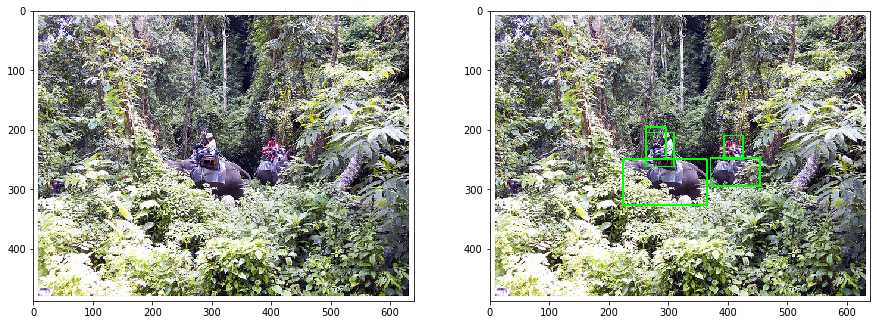

time: 461 ms


In [32]:
def draw_bbox(img,target):
    
    fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,15))
    
    img_org = img.copy()
    blue_color = (255,0,0)
    img = np.array(img)
    for i in range(len(target)):
        bbox = target[i]['bbox']
        x,y,w,h = bbox[0],bbox[1],bbox[2],bbox[3]
        x,y,w,h = int(x),int(y),int(w),int(h)
        print(x,y,w,h,img.shape)
        #img_bbox=cv2.rectangle(train_image, (int(x),int(y)), (int(x)+int(w),int(y)+int(h)), (0,255,0), 10) 
        img_bbox=cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)
    print(type(img_bbox))
    ax1.imshow(img_org)
    ax2.imshow(img)
    im = Image.fromarray(img)
    im.save("your_file.jpeg")

draw_bbox(train_image,class_ids)

In [ ]:
img